# Industry 4.0 의 중심, BigData

<div align='right'><font size=2 color='gray'>Data Processing Based Python @ <font color='blue'><a href='https://www.facebook.com/jskim.kr'>FB / jskim.kr</a></font>, [김진수](bigpycraft@gmail.com)</font></div>
<hr>

# *NumPy Practice II*
>  
> - Advanced indexing and index tricks
> - Tricks and Tips 

In [1]:
import numpy as np

### <font color='brown'> Advanced indexing and index tricks </font>

##### Indexing with Arrays of Indices

In [2]:
a = np.arange(12)**2  # the first 12 square numbers
a

array([  0,   1,   4,   9,  16,  25,  36,  49,  64,  81, 100, 121],
      dtype=int32)

In [3]:
i = np.array([1, 1, 3, 8, 5])  # an array of indices
i

array([1, 1, 3, 8, 5])

In [4]:
a[i]  # the elements of `a` at the positions `i`

array([ 1,  1,  9, 64, 25], dtype=int32)

In [5]:
j = np.array([[3, 4], [9, 7]])  # a bidimensional array of indices
j

array([[3, 4],
       [9, 7]])

In [6]:
a[j]  # the same shape as `j`

array([[ 9, 16],
       [81, 49]], dtype=int32)

In [7]:
palette = np.array([[0, 0, 0],         # black
                    [255, 0, 0],       # red
                    [0, 255, 0],       # green
                    [0, 0, 255],       # blue
                    [255, 255, 255]])  # white


In [8]:
image = np.array([[0, 1, 2, 0],  # each value corresponds to a color in the palette
                  [0, 3, 4, 0]])

In [9]:
palette[image]  # the (2, 4, 3) color image

array([[[  0,   0,   0],
        [255,   0,   0],
        [  0, 255,   0],
        [  0,   0,   0]],

       [[  0,   0,   0],
        [  0,   0, 255],
        [255, 255, 255],
        [  0,   0,   0]]])

##### Indexing with Boolean Arrays

In [10]:
a = np.arange(12).reshape(3, 4)
a

array([[ 0,  1,  2,  3],
       [ 4,  5,  6,  7],
       [ 8,  9, 10, 11]])

In [11]:
i = np.array([[0, 1],  # indices for the first dim of `a`
              [1, 2]])

In [12]:
j = np.array([[2, 1],  # indices for the second dim
              [3, 3]])

In [13]:
a[i, j]  # i and j must have equal shape

array([[ 2,  5],
       [ 7, 11]])

In [14]:
a[i, 2]

array([[ 2,  6],
       [ 6, 10]])

In [15]:
a[:, j]

array([[[ 2,  1],
        [ 3,  3]],

       [[ 6,  5],
        [ 7,  7]],

       [[10,  9],
        [11, 11]]])

In [16]:
l = (i, j)
l

(array([[0, 1],
        [1, 2]]),
 array([[2, 1],
        [3, 3]]))

In [17]:
a[l]

array([[ 2,  5],
       [ 7, 11]])

In [18]:
s = np.array([i, j])
s

array([[[0, 1],
        [1, 2]],

       [[2, 1],
        [3, 3]]])

In [19]:
# not what we want
# a[s]

In [20]:
a[tuple(s)]

array([[ 2,  5],
       [ 7, 11]])

In [21]:
time = np.linspace(20, 145, 5)  # time scale
time

array([ 20.  ,  51.25,  82.5 , 113.75, 145.  ])

In [22]:
data = np.sin(np.arange(20)).reshape(5, 4)  # 4 time-dependent series
data

array([[ 0.        ,  0.84147098,  0.90929743,  0.14112001],
       [-0.7568025 , -0.95892427, -0.2794155 ,  0.6569866 ],
       [ 0.98935825,  0.41211849, -0.54402111, -0.99999021],
       [-0.53657292,  0.42016704,  0.99060736,  0.65028784],
       [-0.28790332, -0.96139749, -0.75098725,  0.14987721]])

In [23]:
# index of the maxima for each series
ind = data.argmax(axis=0)
ind

array([2, 0, 3, 1], dtype=int64)

In [24]:
# times corresponding to the maxima
time_max = time[ind]
time_max

array([ 82.5 ,  20.  , 113.75,  51.25])

In [25]:
data_max = data[ind, range(data.shape[1])]  # => data[ind[0], 0], data[ind[1], 1]...
data_max

array([0.98935825, 0.84147098, 0.99060736, 0.6569866 ])

In [26]:
np.all(data_max == data.max(axis=0))

True

In [27]:
a = np.arange(5)
a

array([0, 1, 2, 3, 4])

In [28]:
a[[1, 3, 4]] = 0
a

array([0, 0, 2, 0, 0])

In [29]:
a = np.arange(5)
a[[0, 0, 2]] = [1, 2, 3]
a

array([2, 1, 3, 3, 4])

In [30]:
a = np.arange(5)
a[[0, 0, 2]] += 1
a

array([1, 1, 3, 3, 4])

##### Indexing with Boolean Arrays

In [31]:
a = np.arange(12).reshape(3, 4)
a

array([[ 0,  1,  2,  3],
       [ 4,  5,  6,  7],
       [ 8,  9, 10, 11]])

In [32]:
b = a > 4
b

array([[False, False, False, False],
       [False,  True,  True,  True],
       [ True,  True,  True,  True]])

In [33]:
a[b]

array([ 5,  6,  7,  8,  9, 10, 11])

In [34]:
a[b] = 0  # All elements of `a` higher than 4 become 0
a

array([[0, 1, 2, 3],
       [4, 0, 0, 0],
       [0, 0, 0, 0]])

In [35]:
import numpy as np
import matplotlib.pyplot as plt

In [36]:
def mandelbrot(h, w, maxit=20, r=2):
    """Returns an image of the Mandelbrot fractal of size (h,w)."""
    x = np.linspace(-2.5, 1.5, 4*h+1)
    y = np.linspace(-1.5, 1.5, 3*w+1)
    A, B = np.meshgrid(x, y)
    C = A + B*1j
    z = np.zeros_like(C)
    divtime = maxit + np.zeros(z.shape, dtype=int)

    for i in range(maxit):
        z = z**2 + C
        diverge = abs(z) > r                    # who is diverging
        div_now = diverge & (divtime == maxit)  # who is diverging now
        divtime[div_now] = i                    # note when
        z[diverge] = r                          # avoid diverging too much

    return divtime

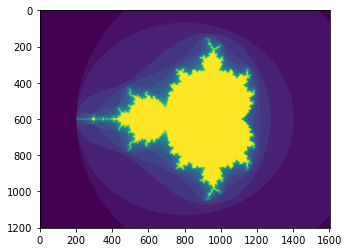

In [37]:
plt.imshow(mandelbrot(400, 400))

##### The ix_() function

In [38]:
a = np.arange(12).reshape(3, 4)
a

array([[ 0,  1,  2,  3],
       [ 4,  5,  6,  7],
       [ 8,  9, 10, 11]])

In [39]:
b1 = np.array([False, True, True])         # first dim selection

In [40]:
b2 = np.array([True, False, True, False])  # second dim selection

In [41]:
a[b1, :]    

array([[ 4,  5,  6,  7],
       [ 8,  9, 10, 11]])

In [42]:
a[b1]   

array([[ 4,  5,  6,  7],
       [ 8,  9, 10, 11]])

In [43]:
a[:, b2]    

array([[ 0,  2],
       [ 4,  6],
       [ 8, 10]])

- a weird thing to do

In [44]:
a[b1, b2]    

array([ 4, 10])

#####  ix_() function

In [45]:
a = np.array([2, 3, 4, 5])
b = np.array([8, 5, 4])
c = np.array([5, 4, 6, 8, 3])
a, b, c

(array([2, 3, 4, 5]), array([8, 5, 4]), array([5, 4, 6, 8, 3]))

In [46]:
ax, bx, cx = np.ix_(a, b, c)

In [47]:
ax

array([[[2]],

       [[3]],

       [[4]],

       [[5]]])

In [48]:
bx

array([[[8],
        [5],
        [4]]])

In [49]:
cx

array([[[5, 4, 6, 8, 3]]])

In [50]:
ax.shape

(4, 1, 1)

In [51]:
bx.shape

(1, 3, 1)

In [52]:
cx.shape

(1, 1, 5)

In [53]:
result = ax + bx * cx
result

array([[[42, 34, 50, 66, 26],
        [27, 22, 32, 42, 17],
        [22, 18, 26, 34, 14]],

       [[43, 35, 51, 67, 27],
        [28, 23, 33, 43, 18],
        [23, 19, 27, 35, 15]],

       [[44, 36, 52, 68, 28],
        [29, 24, 34, 44, 19],
        [24, 20, 28, 36, 16]],

       [[45, 37, 53, 69, 29],
        [30, 25, 35, 45, 20],
        [25, 21, 29, 37, 17]]])

In [54]:
result[3, 2, 4]

17

In [55]:
a[3] + b[2] * c[4]

17

In [56]:
def ufunc_reduce(ufct, *vectors):
    vs = np.ix_(*vectors)
    r = ufct.identity
    for v in vs:
        r = ufct(r, v)
    return r

In [57]:
ufunc_reduce(np.add, a, b, c)

array([[[15, 14, 16, 18, 13],
        [12, 11, 13, 15, 10],
        [11, 10, 12, 14,  9]],

       [[16, 15, 17, 19, 14],
        [13, 12, 14, 16, 11],
        [12, 11, 13, 15, 10]],

       [[17, 16, 18, 20, 15],
        [14, 13, 15, 17, 12],
        [13, 12, 14, 16, 11]],

       [[18, 17, 19, 21, 16],
        [15, 14, 16, 18, 13],
        [14, 13, 15, 17, 12]]])

### <font color='brown'> Tricks and Tips </font>

##### “Automatic” Reshaping

In [58]:
a = np.arange(30)
a

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29])

In [59]:
b = a.reshape((2, -1, 3))  # -1 means "whatever is needed"
b

array([[[ 0,  1,  2],
        [ 3,  4,  5],
        [ 6,  7,  8],
        [ 9, 10, 11],
        [12, 13, 14]],

       [[15, 16, 17],
        [18, 19, 20],
        [21, 22, 23],
        [24, 25, 26],
        [27, 28, 29]]])

In [60]:
b.shape

(2, 5, 3)

##### Vector Stacking

In [61]:
x = np.arange(0, 10, 2)
x

array([0, 2, 4, 6, 8])

In [62]:
y = np.arange(5)
y

array([0, 1, 2, 3, 4])

In [63]:
m = np.vstack([x, y])
m

array([[0, 2, 4, 6, 8],
       [0, 1, 2, 3, 4]])

In [64]:
xy = np.hstack([x, y])
xy

array([0, 2, 4, 6, 8, 0, 1, 2, 3, 4])

##### Histograms

In [65]:
import matplotlib.pyplot as plt

In [66]:
rg = np.random.default_rng(1)
rg

Generator(PCG64) at 0x26A1A475D60

In [67]:
mu, sigma = 2, 0.5

In [68]:
v = rg.normal(mu, sigma, 10000)
v

array([2.1727921 , 2.41080907, 2.16521854, ..., 2.15062613, 1.61436007,
       2.09274213])

(array([0.00128706, 0.00257412, 0.00257412, 0.00257412, 0.00772237,
        0.00900943, 0.01415767, 0.03861183, 0.04247301, 0.03989889,
        0.05663068, 0.08623308, 0.13900258, 0.16088261, 0.24454157,
        0.30117225, 0.34750645, 0.41700774, 0.51997261, 0.60234451,
        0.68214229, 0.69501289, 0.78768128, 0.73619884, 0.79540365,
        0.78896834, 0.72976354, 0.7014482 , 0.69501289, 0.60749275,
        0.57660329, 0.4478972 , 0.39126652, 0.28186634, 0.24196745,
        0.20592975, 0.13385434, 0.10425193, 0.07851072, 0.04762125,
        0.0296024 , 0.03217652, 0.01029649, 0.00900943, 0.0064353 ,
        0.00772237, 0.00514824, 0.00128706, 0.00257412, 0.00128706]),
 array([0.08106893, 0.15876533, 0.23646173, 0.31415813, 0.39185453,
        0.46955093, 0.54724733, 0.62494373, 0.70264013, 0.78033653,
        0.85803293, 0.93572933, 1.01342573, 1.09112213, 1.16881853,
        1.24651493, 1.32421133, 1.40190773, 1.47960413, 1.55730053,
        1.63499693, 1.71269333, 1.79038973, 1.

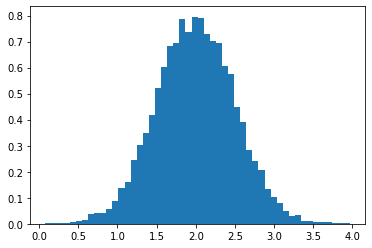

In [69]:
# Plot a normalized histogram with 50 bins
plt.hist(v, bins=50, density=True)       # matplotlib version (plot)

In [70]:
# Compute the histogram with numpy and then plot it
(n, bins) = np.histogram(v, bins=50, density=True)  # NumPy version (no plot)

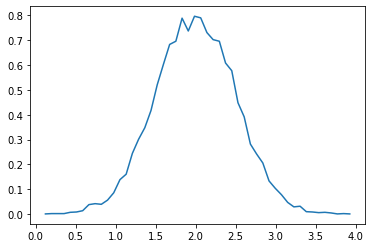

In [71]:
plt.plot(.5 * (bins[1:] + bins[:-1]), n)

In [72]:
# With Matplotlib >=3.4 you can also use plt.stairs(n, bins).

<hr>
<marquee><font size=3 color='brown'>The BigpyCraft find the information to design valuable society with Technology & Craft.</font></marquee>
<div align='right'><font size=2 color='gray'> &lt; The End &gt; </font></div>